## Project - Recommendation Systems

Submitted by: Dr. Shrishail S. Gajbhar as part of the "Recommendation Systems" module project evaluation.

**Data Description:**
Amazon Reviews data repository has several
datasets. For this case study, we are using the Electronics
dataset.

**Name: ratings_Electronics.csv**

**Domain: E-commerce**

**Aim: To build various kinds of recommendation systems using the given dataset.**

**Objective:**
Build a recommendation system to recommend products to
customers based on the their previous ratings for other
products.

**Learning Outcomes:**
* Exploratory Data Analysis
* Creating a Recommendation system using real data
* Collaborative filtering

### About the dataset, column attributes 

**Attribute Information:**
* userId : Every user identified with a unique id
* productId : Every product identified with a unique id
* Rating : Rating of the corresponding product by
the corresponding user
* timestamp : Time of the rating ( ignore this column
for this exercise)

In [87]:
# We require the surprise library in this case, lets install the same first
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678565 sha256=0bdd51f8c7ce91cb7384a4f728947abe64a5629e7d647bb104649ccd8218dd85
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import accuracy
import warnings
warnings.filterwarnings('ignore')

## 1. Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics)

In [3]:
# Read the dataset from google drive link
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# The dataset doesn't have column names we will read the dataset with header = None and provide column names
columns  = ['userId', 'productId', 'rating', 'timestamp']
df_orig = pd.read_csv('drive/My Drive/Colab Notebooks/ratings_Electronics.csv',header=None, names=columns)
df_orig.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
# We do not require the timestamp column
df = df_orig.drop('timestamp',axis=1)
df.head()


,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
# Let's see shape of the data
df.shape

(7824482, 3)

There are approximately 7.8 million entries in the dataset.

Text(0.5, 1.0, 'Histogram of ratings attribute')

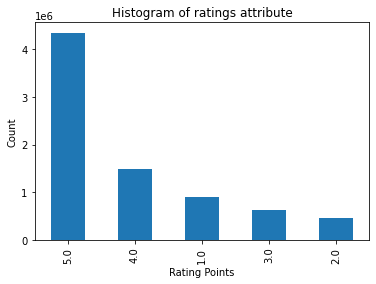

In [7]:
# Histogram of ratings column
df['rating'].value_counts().plot(kind='bar');
plt.ylabel('Count')
plt.xlabel('Rating Points')
plt.title('Histogram of ratings attribute')

In [8]:
df['rating'].value_counts(normalize=True)*100

5.0    55.563308
4.0    18.988874
1.0    11.524916
3.0     8.090925
2.0     5.831977
Name: rating, dtype: float64

One can see that, 55.5% of the entries in the dataset have got the rating of 5, 19% of the entries have rating of 4, 11.5% entries have rating of 1, 8% entries have rating f 3 whereas 5.8% of the entries have rating of 2.

### How many unique products are there?

In [9]:
df['productId'].value_counts().count()

476002

There are 476002 unique electronic items  

### How many unique users are there?

In [10]:
df['userId'].value_counts().count()

4201696

There approximately 4.2 million unique users

### Are there missing values?

In [11]:
df.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

Fortunately, there are no missing values in the dataset

## 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [12]:
df.head()

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [ ]:
userRating_count = df.groupby(by='userId')['rating'].count().sort_values(ascending=False)

In [14]:
userRating_count.head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: rating, dtype: int64

In [15]:
userRating_count.shape

(4201696,)

### Out of 4.2 million users how many of them have given 50 or more number of ratings? 

In [16]:
users_50 = userRating_count[userRating_count>=50]
users_50

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2QAOP52OEB5EV     50
ACH055GTTIGC9      50
A2JRDFIGWTX50J     50
AOTZOHB2LZGYR      50
A2RS66Y79Q8X0W     50
Name: rating, Length: 1540, dtype: int64

There are 1540 users who have given 50 or more number of ratings

In [ ]:
df_new = df[df['userId'].isin(users_50.index)]

In [18]:
df_new.head()

,userId,productId,rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [19]:
# shape of the subset of data to work with
df_new.shape

(125871, 3)

In [20]:
# Reduction in size in percentage
print((1-(df_new.shape[0]/df.shape[0]))*100)

98.39131842849149


### 3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [ ]:
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(df_new, test_size = 0.3, random_state=89)

In [24]:
# Shape of training and test feature set
print("Shape of train data:\t",train_data.shape)
print("Shape of test data:\t",test_data.shape)

Shape of train data:	 (88109, 3)
Shape of test data:	 (37762, 3)


In [ ]:
users = df_new['userId'].unique()

## 4. Build Popularity Recommender model

In [30]:
#Count of user_id for each unique product as recommendation score 
g_train = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
g_train.rename(columns = {'userId': 'score'},inplace=True)
g_train.head()

,productId,score
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [32]:
#Sort the products on recommendation score 
sorted_train = g_train.sort_values(['score', 'productId'], ascending = [0,1]) 
sorted_train.head()

,productId,score
30833,B0088CJT4U,135
19527,B003ES5ZUU,133
8610,B000N99BBC,119
30261,B007WTAJTO,118
30537,B00829TIEK,107


In [ ]:
# Recommendation rank based on score 
sorted_train['Rank'] = sorted_train['score'].rank(ascending=0, method='first')

In [ ]:
#Top 5 recommendations 
popular = sorted_train.head(5)

In [35]:
popular

,productId,score,Rank
30833,B0088CJT4U,135,1.0
19527,B003ES5ZUU,133,2.0
8610,B000N99BBC,119,3.0
30261,B007WTAJTO,118,4.0
30537,B00829TIEK,107,5.0


In [ ]:
# Use popularity based recommender model to make predictions
def recommend(userId):     
    user_reco = popular 
          
    #Add user_id for the recommendations
    user_reco['userId'] = userId 
      
    #user_id column must be the first column
    cols = user_reco.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_reco = user_reco[cols] 
          
    return user_reco

In [39]:
# Use the popularity based model to make predictions for the user id = 1
user_id = users[1]
recommend(user_id)

,userId,productId,score,Rank
30833,AT09WGFUM934H,B0088CJT4U,135,1.0
19527,AT09WGFUM934H,B003ES5ZUU,133,2.0
8610,AT09WGFUM934H,B000N99BBC,119,3.0
30261,AT09WGFUM934H,B007WTAJTO,118,4.0
30537,AT09WGFUM934H,B00829TIEK,107,5.0


In [40]:
# Use the popularity based model to make predictions for the user id = 1111
user_id = users[1111]
recommend(user_id)

,userId,productId,score,Rank
30833,A3V7D0LH8L7BG0,B0088CJT4U,135,1.0
19527,A3V7D0LH8L7BG0,B003ES5ZUU,133,2.0
8610,A3V7D0LH8L7BG0,B000N99BBC,119,3.0
30261,A3V7D0LH8L7BG0,B007WTAJTO,118,4.0
30537,A3V7D0LH8L7BG0,B00829TIEK,107,5.0


### Note the challenge with popularity based recommendation system is that majority of users gets same recommendation of popular products only. 

## 5. Build Collaborative Filtering model

In [41]:
# collaborative filtering is a method to predict a rating for a user item pair based on the history of ratings given by the user and given to the item.
df_collab_filter = pd.concat([train_data, test_data]).reset_index()
df_collab_filter.head()

,index,userId,productId,rating
0,4098486,A2X61KKXXR6WNP,B004GCJEZU,4.0
1,918483,AIJQU979J6UFY,B000FABL7Q,5.0
2,2471412,A5GPH59NDWJRB,B0027VT6V4,5.0
3,3554308,A2JAEZ0FMAMJVW,B003TSTDL2,5.0
4,1842953,A1JZFGZEZVWQPY,B001A5FH9S,5.0


In [44]:
#rows are 'user's and columns are 'item's
pivot_df = df_collab_filter.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.shape

(1540, 48191)

In [45]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,...,B00KSTODWY,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


SVD in the context of recommendation systems is used as a collaborative filtering algorithm.

Most CF algorithms are based on user-item rating matrix where each row represents a user, each column an item. The entries of this matrix are ratings given by users to items.


In [ ]:
from scipy.sparse.linalg import svds

# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 50)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [47]:
# Predicted ratings
ratings_all_user_predicted = np.dot(np.dot(U, sigma), Vt) 

preds_df = pd.DataFrame(ratings_all_user_predicted, columns = pivot_df.columns)
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,...,B00KSTODWY,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,0.002952,0.008525,0.001923,-0.000429,-0.002886,0.003949,0.020008,0.003876,-0.008363,-0.056064,0.006805,-0.004928,0.004677,0.003610,0.030306,-0.000370,0.016971,0.000269,0.020698,-0.002063,-0.000333,0.011196,0.000988,0.003445,0.003703,0.004937,0.009938,0.001626,0.002329,0.005118,...,-0.062713,-0.004551,0.020934,0.026889,0.000050,0.080949,0.305623,0.023159,0.051055,-0.001275,0.306615,-0.032136,0.003623,0.033317,0.211126,0.021486,-0.000569,-0.012997,0.186545,0.080949,-0.112158,0.028931,0.007026,0.379500,0.158210,0.201766,-0.089726,0.206036,0.013959,-0.063592,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,0.023243,0.004748,0.007898,0.000623,0.005389,-0.003116,-0.013192,-0.008088,0.010724,-0.003728,-0.008536,0.008795,-0.002515,-0.017664,0.000958,-0.000209,0.004533,-0.001912,0.014662,-0.015882,0.003647,-0.003395,-0.001423,0.001034,-0.001213,0.000066,0.007949,0.000794,0.030156,0.008864,...,-0.028062,0.069751,0.100250,-0.051989,0.000351,-0.038586,-0.018456,0.012207,-0.090763,0.011983,0.000578,0.004127,0.034131,-0.065956,0.109507,-0.022539,-0.000627,0.038570,-0.088151,-0.038586,0.045624,0.023247,0.008727,-0.021204,-0.017318,-0.015402,0.036499,-0.180672,-0.027860,0.059609,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,0.003830,-0.000115,-0.052219,0.000099,-0.001889,-0.001633,-0.009597,-0.002312,0.013302,0.030823,-0.004591,-0.005223,-0.005087,-0.047911,0.011540,0.000369,-0.005437,-0.001589,-0.016260,0.003775,-0.001121,-0.002047,-0.000017,-0.001266,-0.001747,0.000410,-0.006464,0.000288,-0.002617,-0.004736,...,-0.034186,-0.018237,-0.006772,0.073118,-0.000089,-0.043818,0.033330,0.011557,0.075729,0.007235,0.008621,0.112510,-0.011972,-0.058533,-0.043062,0.012472,-0.000213,0.005964,0.107058,-0.043818,-0.032366,0.072784,0.029582,-0.125087,-0.003514,-0.015004,-0.025893,-0.178518,0.020809,-0.008984,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,0.004506,0.005046,-0.005222,0.009216,0.002443,0.003019,0.012704,0.007380,-0.002409,-0.007586,0.008402,0.004391,0.006039,-0.033126,-0.001186,-0.000356,0.010548,-0.000258,0.031719,-0.000704,0.000331,0.009481,0.000550,0.001440,0.001920,0.000710,-0.001126,0.000525,0.001888,0.007548,...,0.032608,0.025964,-0.026600,-0.038492,0.000487,-0.010766,-0.020472,-0.002667,0.052217,-0.003392,-0.033634,-0.036008,0.004066,0.014100,0.084241,-0.015887,-0.000318,-0.025996,-0.041410,-0.010766,-0.032706,-0.033007,0.007304,0.122311,0.041287,0.125360,-0.026164,-0.126303,0.000990,-0.003605,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002

In [48]:
preds_df.shape

(1540, 48190)

In [ ]:
# Recommend the items with the highest predicted ratings
def recommend_items(userID, pivot_df, preds_df, num_recommendations):      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('Below are the recommended items for user ID: ', userID)
    print(temp.head(num_recommendations))

In [68]:
# Use the collaberative filtering based model to make predictions for the user id = 1
user_id = 1
num_recommendations = 5
recommend_items_collab(user_id,pivot_df, preds_df, num_recommendations)

Below are the recommended items for user ID:  1
                   user_ratings  user_predictions
Recommended Items                                
B0019EHU8G                  0.0          1.407411
B003ES5ZUU                  0.0          1.097482
B007OY5V68                  0.0          0.987353
B000JMJWV2                  0.0          0.946122
B009SYZ8OC                  0.0          0.847875


In [69]:
# Use the collaberative filtering based model to make predictions for the user id = 111
user_id = 111
num_recommendations = 5
recommend_items_collab(user_id,pivot_df, preds_df, num_recommendations)

Below are the recommended items for user ID:  111
                   user_ratings  user_predictions
Recommended Items                                
B004CLYEDC                  0.0          1.482331
B004CLYEE6                  0.0          1.151833
B0034CL2ZI                  0.0          1.138376
B005QCDY50                  0.0          0.983351
B0088CJT4U                  0.0          0.938928


## 6. Evaluate both the models.

In [77]:
# Actual rating given by the users for each product
final_ratings_matrix = df_new.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
final_ratings_matrix.shape

(1540, 48190)

In [78]:
# Average actual rating for each product
final_ratings_matrix.mean()

productId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
                ...   
B00LED02VY    0.002597
B00LGN7Y3G    0.003247
B00LGQ6HL8    0.016234
B00LI4ZZO8    0.005844
B00LKG1MC8    0.003247
Length: 48190, dtype: float64

In [81]:
# We have calculated predicted ratings for each user per product
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,...,B00KSTODWY,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,0.002952,0.008525,0.001923,-0.000429,-0.002886,0.003949,0.020008,0.003876,-0.008363,-0.056064,0.006805,-0.004928,0.004677,0.003610,0.030306,-0.000370,0.016971,0.000269,0.020698,-0.002063,-0.000333,0.011196,0.000988,0.003445,0.003703,0.004937,0.009938,0.001626,0.002329,0.005118,...,-0.062713,-0.004551,0.020934,0.026889,0.000050,0.080949,0.305623,0.023159,0.051055,-0.001275,0.306615,-0.032136,0.003623,0.033317,0.211126,0.021486,-0.000569,-0.012997,0.186545,0.080949,-0.112158,0.028931,0.007026,0.379500,0.158210,0.201766,-0.089726,0.206036,0.013959,-0.063592,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,0.023243,0.004748,0.007898,0.000623,0.005389,-0.003116,-0.013192,-0.008088,0.010724,-0.003728,-0.008536,0.008795,-0.002515,-0.017664,0.000958,-0.000209,0.004533,-0.001912,0.014662,-0.015882,0.003647,-0.003395,-0.001423,0.001034,-0.001213,0.000066,0.007949,0.000794,0.030156,0.008864,...,-0.028062,0.069751,0.100250,-0.051989,0.000351,-0.038586,-0.018456,0.012207,-0.090763,0.011983,0.000578,0.004127,0.034131,-0.065956,0.109507,-0.022539,-0.000627,0.038570,-0.088151,-0.038586,0.045624,0.023247,0.008727,-0.021204,-0.017318,-0.015402,0.036499,-0.180672,-0.027860,0.059609,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,0.003830,-0.000115,-0.052219,0.000099,-0.001889,-0.001633,-0.009597,-0.002312,0.013302,0.030823,-0.004591,-0.005223,-0.005087,-0.047911,0.011540,0.000369,-0.005437,-0.001589,-0.016260,0.003775,-0.001121,-0.002047,-0.000017,-0.001266,-0.001747,0.000410,-0.006464,0.000288,-0.002617,-0.004736,...,-0.034186,-0.018237,-0.006772,0.073118,-0.000089,-0.043818,0.033330,0.011557,0.075729,0.007235,0.008621,0.112510,-0.011972,-0.058533,-0.043062,0.012472,-0.000213,0.005964,0.107058,-0.043818,-0.032366,0.072784,0.029582,-0.125087,-0.003514,-0.015004,-0.025893,-0.178518,0.020809,-0.008984,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,0.004506,0.005046,-0.005222,0.009216,0.002443,0.003019,0.012704,0.007380,-0.002409,-0.007586,0.008402,0.004391,0.006039,-0.033126,-0.001186,-0.000356,0.010548,-0.000258,0.031719,-0.000704,0.000331,0.009481,0.000550,0.001440,0.001920,0.000710,-0.001126,0.000525,0.001888,0.007548,...,0.032608,0.025964,-0.026600,-0.038492,0.000487,-0.010766,-0.020472,-0.002667,0.052217,-0.003392,-0.033634,-0.036008,0.004066,0.014100,0.084241,-0.015887,-0.000318,-0.025996,-0.041410,-0.010766,-0.032706,-0.033007,0.007304,0.122311,0.041287,0.125360,-0.026164,-0.126303,0.000990,-0.003605,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002

In [82]:
# Average predicted rating for each item
preds_df.mean()

productId
0594451647    0.001953
0594481813    0.002875
0970407998    0.003355
0972683275    0.010343
1400501466    0.004871
                ...   
B00LED02VY    0.001008
B00LGN7Y3G    0.002188
B00LGQ6HL8    0.013885
B00LI4ZZO8    0.005570
B00LKG1MC8    0.001912
Length: 48190, dtype: float64

In [83]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0594451647,0.003247,0.001953,0
0594481813,0.001948,0.002875,1
0970407998,0.003247,0.003355,2
0972683275,0.012338,0.010343,3
1400501466,0.012987,0.004871,4


In [84]:
rmse = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
rmse

0.00275

## Get top - K ( K = 5) recommendations.

In [85]:
find_recom = [5,888, 996, 100, 575, 50]   # Selected users to whom recommendation needs to be provided
num_recommendations = 5
for i in find_recom:
    print("")
    recommend_items(i, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user ID:  5
                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          0.745958
B003ES5ZUU                  0.0          0.633890
B008DWCRQW                  0.0          0.618328
B002SQK2F2                  0.0          0.535753
B0015DYMVO                  0.0          0.521440

Below are the recommended items for user ID:  888
                   user_ratings  user_predictions
Recommended Items                                
B003ES5ZUU                  0.0          0.589085
B000LRMS66                  0.0          0.543340
B005FYNSPK                  0.0          0.528370
B000HPV3RW                  0.0          0.494201
B0002L5R78                  0.0          0.416793

Below are the recommended items for user ID:  996
                   user_ratings  user_predictions
Recommended Items                                
B00007E7JU                  0.0          0.347507

## Summarise your insights.

* Popularity based recommendtaion system is generalized while Model-based Collaborative Filtering is customized for each user based on their purchase history and ratings. Model based collaborative filtering can be used if the database has customer's ratings already.

* In case of new customers, popularity based recommendation system may  be considered since the user likings are unknwown. It may be customized based on more parameters like language, genre, location, ethnicity etc.,

## Extra Work: Building user-user and item-item collaberative filtering based recommendation systems

In [ ]:
from surprise import dataset
from surprise import Reader

In [99]:
data_s = df_new.copy()
# we need to rename the columns as userID, productID and rating 
data_s.columns = ['userID','itemID','rating']
data_s.head()

,userID,itemID,rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [ ]:
# We need to create a dummy reader
reader = Reader(line_format='user item rating', rating_scale=(1, 5))

In [ ]:
# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['userID'], df['itemID'], df['rating'])]
        self.reader=reader

data = MyDataset(data_s, reader)

In [ ]:
from surprise import model_selection
trainset, testset = model_selection.train_test_split(data, test_size=.3)

In [107]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [108]:
uid = str(196)  # raw user id
iid = str(302)  # raw item id
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: 196        item: 302        r_ui = None   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [ ]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [110]:
test_pred

[Prediction(uid='A54S9CIUV5VNB', iid='B001E1Y5O6', r_ui=4.0, est=4.4409606649103335, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='AKSQNMIKOU01H', iid='B008OILV3A', r_ui=5.0, est=4.260892757834046, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A26877IWJGISYM', iid='B002SQK2F2', r_ui=2.0, est=2.9537654204010177, details={'actual_k': 14, 'was_impossible': False}),
 Prediction(uid='AFHYEO3Y1IIDD', iid='B004FLL54U', r_ui=2.0, est=4.260892757834046, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A34UVV757IKPVB', iid='B001UI2FPE', r_ui=5.0, est=4.44510130679076, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A1Z7SC7HH1BJKA', iid='B008RGD114', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ALDAF4VVLFRHP', iid='B007DAJVVE', r_ui=4.0, est=4.260892757834046, details={'was_impossible': True, 'reason': 'User and/or item is unk

In [111]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0540


1.0539999544040006

### Building the item-item based recommendation system.

By using the code written for user-user collaberative filtering based model, we can built an item-item based recommendation system by just modifying the one line as

algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})